In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
df = pd.read_excel("atleti-data-prep.xlsx")
df.head()

,home,result,opp_goals,opp_shots_pg,opp_possession,opp_pass,opp_aerials_won,opp_rating,opp_shots_pg_conceded,opp_tackles_pg,opp_interceptions_pg,opp_fouls_pg,opp_offsides_pg,opp_shots_OT_pg,opp_dribbles_pg,opp_fouled_pg,opp_out_of_box,opp_six_yard_box,opp_penalty_area
0,1,W,47,9.4,43.4,70.0,18.3,6.47,12.6,13.1,10.3,14.0,2.2,3.3,8.2,12.3,4.1,0.7,4.7
1,0,D,34,10.7,48.7,79.8,15.7,6.55,11.1,14.6,11.5,13.9,2.7,3.6,11.2,13.6,3.8,0.9,6.0
2,1,D,60,10.7,54.3,84.4,13.0,6.66,10.8,14.2,9.8,11.8,2.3,4.7,10.5,10.9,3.1,0.8,6.7
3,0,W,55,9.4,52.0,79.9,16.5,6.60,10.9,17.4,10.7,16.6,1.7,3.7,7.3,12.9,2.8,0.8,5.8
4,1,W,50,11.7,52.9,82.0,16.4,6.64,9.6,14.6,11.9,13.7,1.7,4.2,11.0,12.7,5.0,0.7,5.9


In [4]:
df.describe()

,home,opp_goals,opp_shots_pg,opp_possession,opp_pass,opp_aerials_won,opp_rating,opp_shots_pg_conceded,opp_tackles_pg,opp_interceptions_pg,opp_fouls_pg,opp_offsides_pg,opp_shots_OT_pg,opp_dribbles_pg,opp_fouled_pg,opp_out_of_box,opp_six_yard_box,opp_penalty_area
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.500000,46.631579,10.584211,49.905263,78.200000,17.294737,6.584737,10.721053,14.0,10.478947,13.268421,1.989474,3.663158,9.089474,12.415789,3.889474,0.826316,5.857895
std,0.506712,14.347843,1.935797,5.817260,6.555872,4.313082,0.120421,1.618668,1.2,0.937264,1.738298,0.346246,0.896968,1.836240,1.117073,0.881580,0.260648,1.059993
min,0.000000,28.000000,7.100000,38.500000,66.500000,10.600000,6.460000,8.400000,12.2,8.300000,9.400000,1.300000,2.400000,6.400000,10.200000,2.300000,0.500000,4.100000
25%,0.000000,34.500000,9.425000,45.000000,72.675000,13.825000,6.492500,9.250000,13.1,9.900000,12.250000,1.800000,3.125000,7.775000,12.025000,3.200000,0.600000,5.225000
50%,0.500000,46.000000,10.300000,49.200000,79.800000,16.600000,6.540000,10.800000,14.0,10.400000,13.400000,1.900000,3.600000,8.700000,12.700000,3.800000,0.800000,5.800000
75%,1.000000,54.500000,11.600000,53.500000,81.875000,18.450000,6.647500,12.100000,14.6,11.375000,13.975000,2.300000,4.025000,10.450000,13.275000,4.425000,0.975000,6.475000
max,1.000000,85.000000,15.300000,62.400000,89.700000,26.800000,6.870000,14.400000,17.4,11.900000,16.600000,2.700000,6.400000,13.500000,13.800000,5.600000,1.400000,8.400000


In [5]:
from sklearn.model_selection import train_test_split

# left is the target variable
X = df.loc[:, df.columns != 'result']
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
from sklearn import linear_model
initial_lm_mod = linear_model.LogisticRegression(max_iter=1000, penalty='none')
initial_lm_mod.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

In [7]:
def get_feature_importance(clf, feature_names):
    return pd.DataFrame({'variable': feature_names, # Feature names
                         'coefficient': clf.coef_[0] # Feature Coeficients
                    }) \
    .round(decimals=2) \
    .sort_values('coefficient', ascending=False) \
    .style.bar(color=['red', 'green'], align='zero')

In [8]:
get_feature_importance(initial_lm_mod, X_train.columns)

,variable,coefficient
8,opp_tackles_pg,33.900000
13,opp_dribbles_pg,27.970000
6,opp_rating,25.060000
11,opp_offsides_pg,21.660000
17,opp_penalty_area,17.510000
3,opp_possession,16.800000
9,opp_interceptions_pg,16.540000
12,opp_shots_OT_pg,16.450000
10,opp_fouls_pg,6.240000
1,opp_goals,-2.910000


In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Accuracy = 0.6250
Confusion matrix, without normalization
[[0 0 0]
 [1 0 0]
 [0 2 5]]


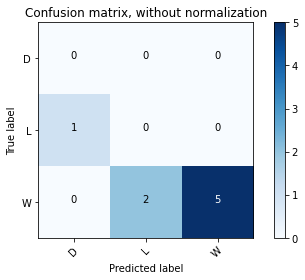

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy = {0:.4f}".format(accuracy_score(y_test,initial_lm_mod.predict(X_test))))

cnf_matrix = confusion_matrix(y_test, initial_lm_mod.predict(X_test))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['D', 'L', 'W'],
                      title='Confusion matrix, without normalization')

In [11]:
v0_model = linear_model.LogisticRegression(max_iter=1000, penalty='none')
v0_model.fit(X, y)

LogisticRegression(max_iter=1000, penalty='none')

In [12]:
df2 = pd.read_excel("real_sociedad.xlsx")
df2.head()

,home,opp_goals,opp_shots_pg,opp_possession,opp_pass,opp_aerials_won,opp_rating,opp_shots_pg_conceded,opp_tackles_pg,opp_interceptions_pg,opp_fouls_pg,opp_offsides_pg,opp_shots_OT_pg,opp_dribbles_pg,opp_fouled_pg,opp_out_of_box,opp_six_yard_box,opp_penalty_area
0,1,59,11.3,53.7,80.8,17.9,6.65,8.9,14.4,8.3,14.9,2.3,4.1,8.7,12.1,3.5,1.3,6.5


In [13]:
v0_model.predict(df2)

array(['W'], dtype=object)